<a href="https://colab.research.google.com/github/NivratiKothari/Marketing-research-methods-Nivrati_Kothari-_-Jio-Institute/blob/main/Logistic_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def add_numbers(a, b):
    return a + b

# Example usage
num1 = float(input("Enter first number: "))
num2 = float(input("Enter second number: "))

result = add_numbers(num1, num2)
print(f"The sum of {num1} and {num2} is {result}")


Enter first number: 25
Enter second number: 44
The sum of 25.0 and 44.0 is 69.0


  Condition1     Condition2  Purchase Likelihood
0        Fee  high discount             5.375000
1        Fee   low discount             2.208333
2     No Fee  high discount             5.958333
3     No Fee   low discount             3.875000


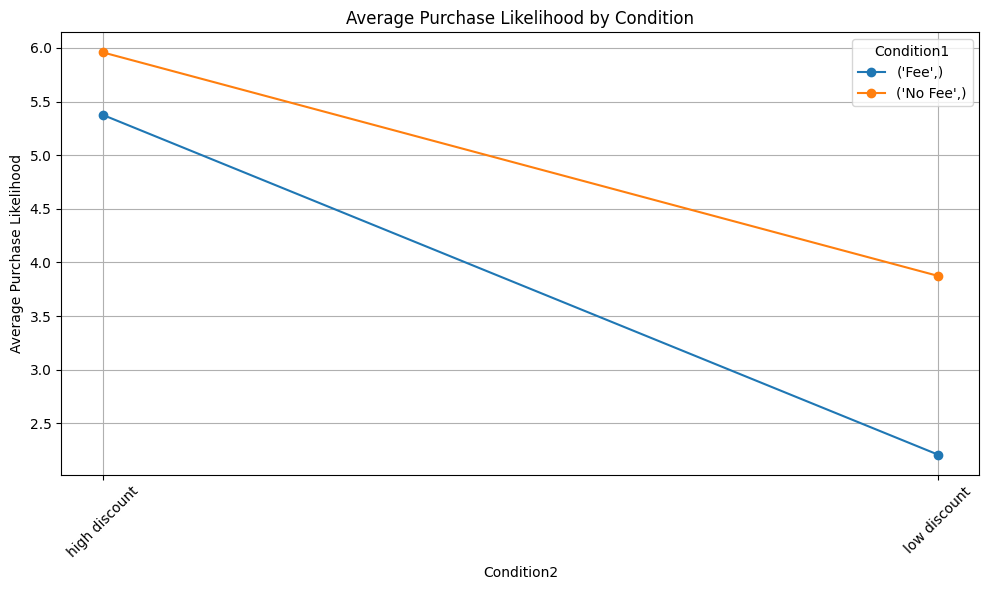

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Simulated data (replace with actual data if needed)
data = """Purchase Likelihood\tCondition1\tCondition2
7\tFee\thigh discount
6\tFee\thigh discount
5\tFee\thigh discount
6\tFee\thigh discount
7\tFee\thigh discount
6\tFee\thigh discount
5\tFee\thigh discount
6\tFee\thigh discount
5\tFee\thigh discount
4\tFee\thigh discount
6\tFee\thigh discount
5\tFee\thigh discount
5\tFee\thigh discount
6\tFee\thigh discount
5\tFee\thigh discount
6\tFee\thigh discount
5\tFee\thigh discount
6\tFee\thigh discount
4\tFee\thigh discount
4\tFee\thigh discount
5\tFee\thigh discount
4\tFee\thigh discount
6\tFee\thigh discount
5\tFee\thigh discount
2\tFee\tlow discount
1\tFee\tlow discount
3\tFee\tlow discount
2\tFee\tlow discount
1\tFee\tlow discount
3\tFee\tlow discount
2\tFee\tlow discount
3\tFee\tlow discount
2\tFee\tlow discount
3\tFee\tlow discount
2\tFee\tlow discount
1\tFee\tlow discount
3\tFee\tlow discount
2\tFee\tlow discount
3\tFee\tlow discount
4\tFee\tlow discount
2\tFee\tlow discount
1\tFee\tlow discount
2\tFee\tlow discount
3\tFee\tlow discount
2\tFee\tlow discount
1\tFee\tlow discount
3\tFee\tlow discount
2\tFee\tlow discount
4\tNo Fee\tlow discount
5\tNo Fee\tlow discount
3\tNo Fee\tlow discount
4\tNo Fee\tlow discount
4\tNo Fee\tlow discount
5\tNo Fee\tlow discount
3\tNo Fee\tlow discount
2\tNo Fee\tlow discount
1\tNo Fee\tlow discount
4\tNo Fee\tlow discount
3\tNo Fee\tlow discount
4\tNo Fee\tlow discount
5\tNo Fee\tlow discount
6\tNo Fee\tlow discount
4\tNo Fee\tlow discount
5\tNo Fee\tlow discount
4\tNo Fee\tlow discount
3\tNo Fee\tlow discount
2\tNo Fee\tlow discount
6\tNo Fee\tlow discount
5\tNo Fee\tlow discount
3\tNo Fee\tlow discount
4\tNo Fee\tlow discount
4\tNo Fee\tlow discount
7\tNo Fee\thigh discount
6\tNo Fee\thigh discount
3\tNo Fee\thigh discount
5\tNo Fee\thigh discount
7\tNo Fee\thigh discount
6\tNo Fee\thigh discount
7\tNo Fee\thigh discount
6\tNo Fee\thigh discount
5\tNo Fee\thigh discount
7\tNo Fee\thigh discount
6\tNo Fee\thigh discount
7\tNo Fee\thigh discount
5\tNo Fee\thigh discount
6\tNo Fee\thigh discount
7\tNo Fee\thigh discount
6\tNo Fee\thigh discount
5\tNo Fee\thigh discount
7\tNo Fee\thigh discount
6\tNo Fee\thigh discount
7\tNo Fee\thigh discount
6\tNo Fee\thigh discount
5\tNo Fee\thigh discount
5\tNo Fee\thigh discount
6\tNo Fee\thigh discount"""

# Load data into DataFrame
df = pd.read_csv(StringIO(data), sep="\t")

# Group by conditions and calculate average purchase likelihood
average_likelihood = df.groupby(['Condition1', 'Condition2'])['Purchase Likelihood'].mean().reset_index()

# Display the result
print(average_likelihood)

# Plotting
plt.figure(figsize=(10, 6))
for key, grp in average_likelihood.groupby(['Condition1']):
    plt.plot(grp['Condition2'], grp['Purchase Likelihood'], marker='o', label=key)

plt.title('Average Purchase Likelihood by Condition')
plt.xlabel('Condition2')
plt.ylabel('Average Purchase Likelihood')
plt.legend(title="Condition1")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


                                 sum_sq    df           F        PR(>F)
C(Condition1)                 30.375000   1.0   30.652651  2.898338e-07
C(Condition2)                165.375000   1.0  166.886654  2.202389e-22
C(Condition1):C(Condition2)    7.041667   1.0    7.106033  9.074571e-03
Residual                      91.166667  92.0         NaN           NaN


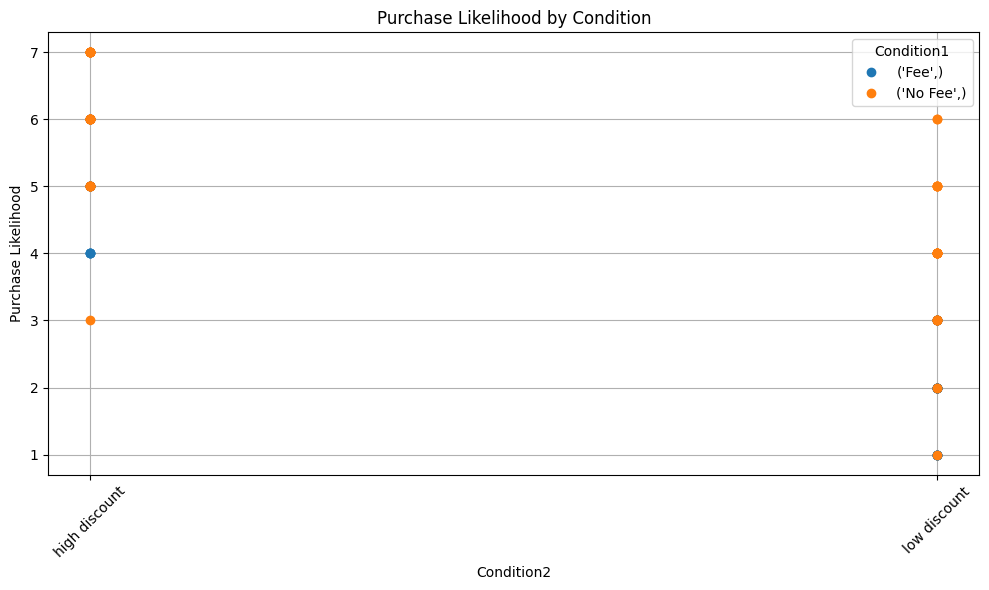

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Simulated data (replace with actual data if needed)
data = """Purchase Likelihood\tCondition1\tCondition2
7\tFee\thigh discount
6\tFee\thigh discount
5\tFee\thigh discount
6\tFee\thigh discount
7\tFee\thigh discount
6\tFee\thigh discount
5\tFee\thigh discount
6\tFee\thigh discount
5\tFee\thigh discount
4\tFee\thigh discount
6\tFee\thigh discount
5\tFee\thigh discount
5\tFee\thigh discount
6\tFee\thigh discount
5\tFee\thigh discount
6\tFee\thigh discount
5\tFee\thigh discount
6\tFee\thigh discount
4\tFee\thigh discount
4\tFee\thigh discount
5\tFee\thigh discount
4\tFee\thigh discount
6\tFee\thigh discount
5\tFee\thigh discount
2\tFee\tlow discount
1\tFee\tlow discount
3\tFee\tlow discount
2\tFee\tlow discount
1\tFee\tlow discount
3\tFee\tlow discount
2\tFee\tlow discount
3\tFee\tlow discount
2\tFee\tlow discount
3\tFee\tlow discount
2\tFee\tlow discount
1\tFee\tlow discount
3\tFee\tlow discount
2\tFee\tlow discount
3\tFee\tlow discount
4\tFee\tlow discount
2\tFee\tlow discount
1\tFee\tlow discount
2\tFee\tlow discount
3\tFee\tlow discount
2\tFee\tlow discount
1\tFee\tlow discount
3\tFee\tlow discount
2\tFee\tlow discount
4\tNo Fee\tlow discount
5\tNo Fee\tlow discount
3\tNo Fee\tlow discount
4\tNo Fee\tlow discount
4\tNo Fee\tlow discount
5\tNo Fee\tlow discount
3\tNo Fee\tlow discount
2\tNo Fee\tlow discount
1\tNo Fee\tlow discount
4\tNo Fee\tlow discount
3\tNo Fee\tlow discount
4\tNo Fee\tlow discount
5\tNo Fee\tlow discount
6\tNo Fee\tlow discount
4\tNo Fee\tlow discount
5\tNo Fee\tlow discount
4\tNo Fee\tlow discount
3\tNo Fee\tlow discount
2\tNo Fee\tlow discount
6\tNo Fee\tlow discount
5\tNo Fee\tlow discount
3\tNo Fee\tlow discount
4\tNo Fee\tlow discount
4\tNo Fee\tlow discount
7\tNo Fee\thigh discount
6\tNo Fee\thigh discount
3\tNo Fee\thigh discount
5\tNo Fee\thigh discount
7\tNo Fee\thigh discount
6\tNo Fee\thigh discount
7\tNo Fee\thigh discount
6\tNo Fee\thigh discount
5\tNo Fee\thigh discount
7\tNo Fee\thigh discount
6\tNo Fee\thigh discount
7\tNo Fee\thigh discount
5\tNo Fee\thigh discount
6\tNo Fee\thigh discount
7\tNo Fee\thigh discount
6\tNo Fee\thigh discount
5\tNo Fee\thigh discount
7\tNo Fee\thigh discount
6\tNo Fee\thigh discount
7\tNo Fee\thigh discount
6\tNo Fee\thigh discount
5\tNo Fee\thigh discount
5\tNo Fee\thigh discount
6\tNo Fee\thigh discount"""

# Load data into DataFrame
df = pd.read_csv(StringIO(data), sep="\t")

# Perform ANOVA
model = ols('Q("Purchase Likelihood") ~ C(Condition1) * C(Condition2)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Plotting
plt.figure(figsize=(10, 6))
for key, grp in df.groupby(['Condition1']):
    plt.plot(grp['Condition2'], grp['Purchase Likelihood'], marker='o', linestyle='', label=key)

plt.title('Purchase Likelihood by Condition')
plt.xlabel('Condition2')
plt.ylabel('Purchase Likelihood')
plt.legend(title="Condition1")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# New Section

FileNotFoundError: [Errno 2] No such file or directory: 'autos - regression - autos.csv.csv'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Path to the dataset file
file_path = '/content/autos regression.csv'

# Load data into DataFrame
df = pd.read_csv(file_path)

# Handle missing data by filling with the mode or median for numerical columns
df.fillna({'vehicleType': 'unknown', 'gearbox': 'unknown', 'notRepairedDamage': 'unknown', 'fuelType': 'unknown', 'model': 'unknown'}, inplace=True)
df['powerPS'].fillna(df['powerPS'].median(), inplace=True)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage', 'model'], drop_first=True)

# Define dependent and independent variables
X = df.drop(['price', 'index', 'name', 'dateCrawled', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'], axis=1)
y = df['price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the prices
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': regressor.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

# Assumptions:
# 1. Linearity - The relationship between the DV and IVs is linear.
# 2. No multicollinearity - Categorical encoding may introduce collinearity.
# 3. Homoscedasticity - Residuals have constant variance.
# 4. Normality of residuals - Assumed normal distribution of errors.


<ipython-input-9-ec43ff3be5e9>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['powerPS'].fillna(df['powerPS'].median(), inplace=True)


Mean Squared Error: 415657676035.16705
R-squared: -0.42868399183906014
                  Feature   Coefficient
65              model_145  1.711581e+06
56   brand_sonstige_autos  5.704959e+05
170        model_forester  1.669686e+05
205          model_legacy  1.475654e+05
193           model_justy  1.402667e+05
..                    ...           ...
19        fuelType_diesel -1.330332e+07
18           fuelType_cng -1.330451e+07
22           fuelType_lpg -1.331721e+07
21        fuelType_hybrid -1.333102e+07
20       fuelType_elektro -1.347223e+07

[316 rows x 2 columns]


<ipython-input-10-8c85ae700ab6>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['powerPS'].fillna(df['powerPS'].median(), inplace=True)
<ipython-input-10-8c85ae700ab6>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Mean Squared Error: 415657676035.16705
R-squared: -0.42868399183906014
                  Feature   Coefficient
65              model_145  1.711581e+06
56   brand_sonstige_autos  5.704959e+05
170        model_forester  1.669686e+05
205          model_legacy  1.475654e+05
193           model_justy  1.402667e+05
..                    ...           ...
19        fuelType_diesel -1.330332e+07
18           fuelType_cng -1.330451e+07
22           fuelType_lpg -1.331721e+07
21        fuelType_hybrid -1.333102e+07
20       fuelType_elektro -1.347223e+07

[316 rows x 2 columns]


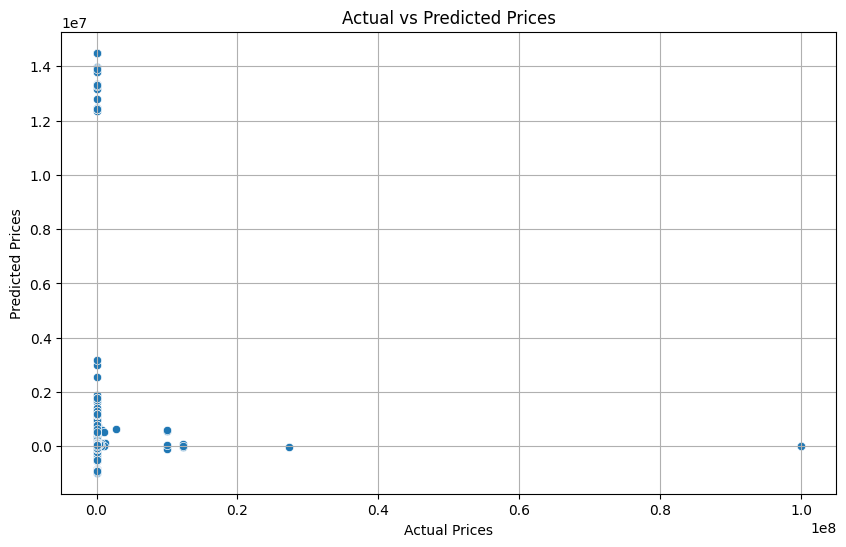

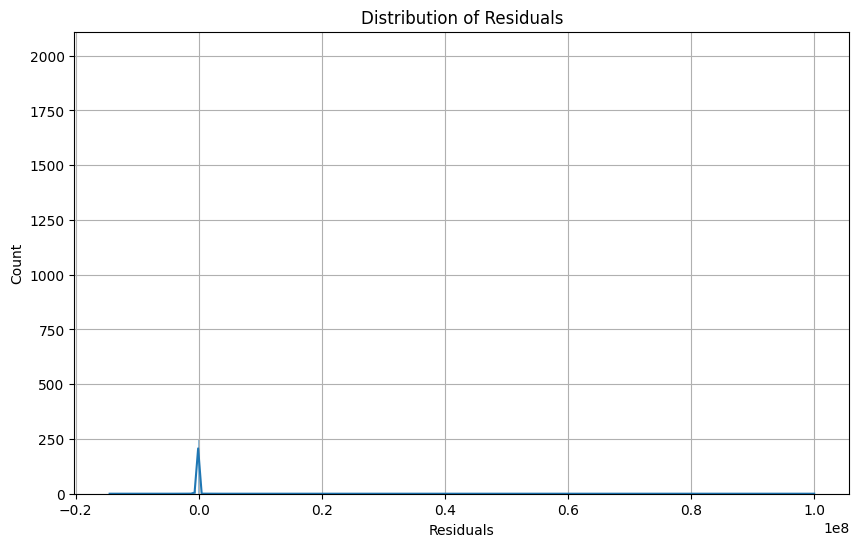

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Path to the dataset file
file_path = '/content/autos regression.csv'

# Load data into DataFrame
df = pd.read_csv(file_path)

# Handle missing data
# Fill numerical columns with median and categorical columns with mode
df['powerPS'].fillna(df['powerPS'].median(), inplace=True)
df['yearOfRegistration'].fillna(df['yearOfRegistration'].median(), inplace=True)
df.fillna({'vehicleType': 'unknown', 'gearbox': 'unknown', 'notRepairedDamage': 'unknown', 'fuelType': 'unknown', 'model': 'unknown'}, inplace=True)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage', 'model'], drop_first=True)

# Define dependent and independent variables
X = df.drop(['price', 'index', 'name', 'dateCrawled', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'], axis=1)
y = df['price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the prices
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': regressor.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

# Visualization of regression results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

# Visualization of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

# Assumptions:
# 1. Linearity - The relationship between the dependent and independent variables is assumed linear.
# 2. No multicollinearity - Categorical encoding can introduce collinearity; VIF checks may be required.
# 3. Homoscedasticity - Constant variance of residuals across predictions.
# 4. Normality of residuals - Residuals are assumed to be normally distributed.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.894620486366986
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1205
           1       0.56      0.30      0.39       152

    accuracy                           0.89      1357
   macro avg       0.74      0.63      0.66      1357
weighted avg       0.88      0.89      0.88      1357

Feature Coefficients:

age: -0.004658486457820691
balance: -2.7867388551595347e-05
day: 0.003969136823239168
duration: 0.004534296276802619
campaign: -0.07719035050866824
pdays: -0.0031734034266489904
previous: -0.03245436915232477
job_blue-collar: -0.5962196169285067
job_entrepreneur: -0.49525046784990856
job_housemaid: -0.09867519602775758
job_management: 0.09170967265485293
job_retired: 0.6829649568385602
job_self-employed: -0.09519876727440944
job_services: -0.3182915813441231
job_student: 0.2135052809082079
job_technician: -0.15970211149116054
job_unemployed: -0.4241962456177811
job_unknown: 0.034181226701106

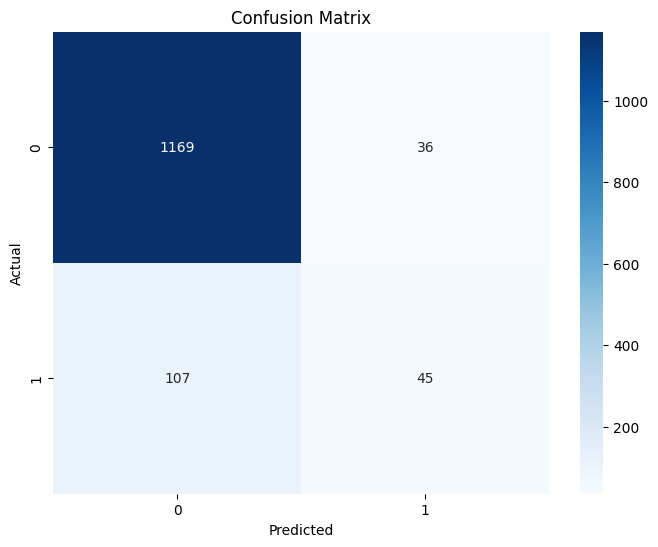

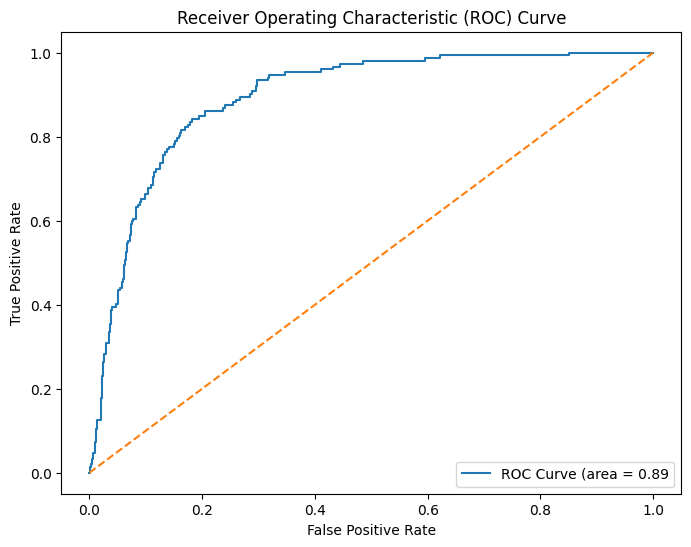

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

# Step 1: Load data from file
file_path = '/content/bank marketing - logistic.xlsx'  # Path to the Excel file

def load_data(file_path):
    return pd.read_excel(file_path)

# Step 2: Preprocess data
def preprocess_data(data):
    # Identify categorical variables
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('y')  # Exclude the dependent variable

    # Convert categorical variables to dummy variables
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

    # Convert dependent variable 'y' to binary (1 for 'yes', 0 for 'no')
    data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

    # Split data into independent (X) and dependent (y) variables
    X = data.drop(['y'], axis=1)  # All variables except 'y'
    y = data['y']  # Target variable

    return X, y

# Step 3: Train logistic regression model
def train_logistic_regression(X, y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize logistic regression model
    model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return model, y_test, y_pred, y_prob

# Step 4: Visualization and Performance Evaluation
def visualize_results(y_test, y_pred, y_prob):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Step 5: Main function to execute the steps
def main():
    data = load_data(file_path)

    # Preprocess the data
    X, y = preprocess_data(data)

    # Train the logistic regression model
    model, y_test, y_pred, y_prob = train_logistic_regression(X, y)

    # Display the coefficients of the logistic regression model
    print("Feature Coefficients:\n")
    for feature, coef in zip(X.columns, model.coef_[0]):
        print(f"{feature}: {coef}")

    # Visualize results
    visualize_results(y_test, y_pred, y_prob)

# Execute the main function
if __name__ == "__main__":
    main()





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.894620486366986
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1205
           1       0.56      0.30      0.39       152

    accuracy                           0.89      1357
   macro avg       0.74      0.63      0.66      1357
weighted avg       0.88      0.89      0.88      1357

Logistic Regression Feature Coefficients:

age: -0.004658486457820691
balance: -2.7867388551595347e-05
day: 0.003969136823239168
duration: 0.004534296276802619
campaign: -0.07719035050866824
pdays: -0.0031734034266489904
previous: -0.03245436915232477
job_blue-collar: -0.5962196169285067
job_entrepreneur: -0.49525046784990856
job_housemaid: -0.09867519602775758
job_management: 0.09170967265485293
job_retired: 0.6829649568385602
job_self-employed: -0.09519876727440944
job_services: -0.3182915813441231
job_student: 0.2135052809082079
job_technician: -0.15970211149116054
job_unemployed: -0.4241962456177811
job_unknow

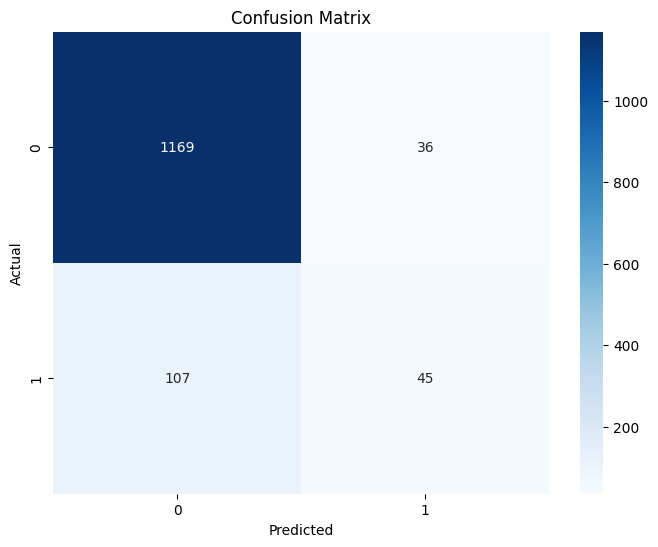

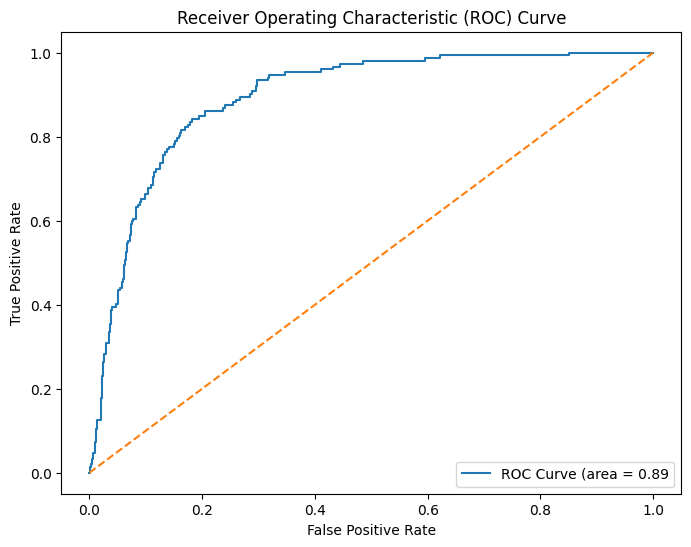

NameError: name 'train_decision_tree' is not defined

In [ ]:
# Step 6: Main function to execute the steps
def main():
    data = load_data(file_path)

    # Preprocess the data
    X, y = preprocess_data(data)

    # Train the logistic regression model
    model, y_test, y_pred, y_prob = train_logistic_regression(X, y)

    # Display the coefficients of the logistic regression model
    print("Logistic Regression Feature Coefficients:\n")
    for feature, coef in zip(X.columns, model.coef_[0]):
        print(f"{feature}: {coef}")

    # Visualize logistic regression results
    visualize_results(y_test, y_pred, y_prob)

    # Train and visualize decision tree
    train_decision_tree(X, y)

# Execute the main function
if __name__ == "__main__":
    main()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime

# Load the dataset
file_path = "/content/Online_Sales.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Convert Transaction_Date to datetime
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%d-%m-%Y')

# Aggregate data to calculate RFM metrics
# Define the current date as a reference for recency calculation
current_date = df['Transaction_Date'].max()

# Group data by CustomerID
rfm = df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (current_date - x.max()).days,  # Recency
    'Transaction_ID': 'nunique',  # Frequency
    'Avg_Price': lambda x: (x * df.loc[x.index, 'Quantity']).sum()  # Monetary
}).reset_index()

# Rename columns
rfm.rename(columns={
    'Transaction_Date': 'Recency',
    'Transaction_ID': 'Frequency',
    'Avg_Price': 'Monetary'
}, inplace=True)

# Add RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])  # 4: Most recent, 1: Least recent
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])  # 4: Most frequent
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])  # 4: Highest monetary value

# Combine RFM scores into a single RFM_Segment
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Label customer segments based on RFM score
def rfm_segment(df):
    if df['RFM_Score'] >= 9:
        return 'Champions'
    elif df['RFM_Score'] >= 7:
        return 'Loyal Customers'
    elif df['RFM_Score'] >= 5:
        return 'Potential Loyalists'
    else:
        return 'Needs Attention'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

# Display the RFM dataframe
import ace_tools as tools; tools.display_dataframe_to_user(name="RFM Analysis with Segments", dataframe=rfm)

ValueError: time data "01-Jan-19" doesn't match format "%d-%m-%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime

# Load the dataset
file_path = "/content/Online_Sales.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Convert Transaction_Date to datetime, handling potential two-digit years
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%d-%m-%Y', errors='coerce')  # Handle errors by setting invalid dates to NaT
# Or, try to infer format automatically with dayfirst=True to accommodate '01-Jan-19' format
# df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], dayfirst=True, errors='coerce')
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'].str.strip(), format='%d-%b-%y', errors='coerce').fillna(pd.to_datetime(df['Transaction_Date'].str.strip(), format='%d-%m-%Y', errors='coerce'))  # errors='coerce' handles format errors gracefully

# ... (rest of your code)


AttributeError: Can only use .str accessor with string values!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

# Step 1: Load data from file
file_path ="/content/Online_Sales.csv"  # Path to the Excel file

def load_data(file_path):
    data = pd.read_excel(file_path)
    # Handle date columns if present
    for col in data.select_dtypes(include=['datetime64']).columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')  # Coerce invalid dates to NaT
        data[col] = data[col].dt.strftime('%Y%m%d').astype(float)  # Convert date to numerical format
    return data

# Step 2: Preprocess data
def preprocess_data(data):
    # Identify categorical variables
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('y')  # Exclude the dependent variable

    # Convert categorical variables to dummy variables
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

    # Convert dependent variable 'y' to binary (1 for 'yes', 0 for 'no')
    data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

    # Split data into independent (X) and dependent (y) variables
    X = data.drop(['y'], axis=1)  # All variables except 'y'
    y = data['y']  # Target variable

    return X, y

# Step 3: Train logistic regression model
def train_logistic_regression(X, y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize logistic regression model
    model = LogisticRegression(max_iter=1000)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

    # Evaluate the model
    print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return model, y_test, y_pred, y_prob

# Step 4: Train decision tree model
def train_decision_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize decision tree model
    tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

    # Train the model
    tree_model.fit(X_train, y_train)

    # Make predictions
    y_pred = tree_model.predict(X_test)

    # Evaluate the model
    print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot decision tree
    plt.figure(figsize=(15, 10))
    plot_tree(tree_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
    plt.title('Decision Tree Visualization')
    plt.show()

    return tree_model

# Step 5: Visualization and Performance Evaluation
def visualize_results(y_test, y_pred, y_prob):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Step 6: Main function to execute the steps
def main():
    data = load_data(file_path)

    # Preprocess the data
    X, y = preprocess_data(data)

    # Train the logistic regression model
    model, y_test, y_pred, y_prob = train_logistic_regression(X, y)

    # Display the coefficients of the logistic regression model
    print("Logistic Regression Feature Coefficients:\n")
    for feature, coef in zip(X.columns, model.coef_[0]):
        print(f"{feature}: {coef}")

    # Visualize logistic regression results
    visualize_results(y_test, y_pred, y_prob)

    # Train and visualize decision tree
    train_decision_tree(X, y)

# Execute the main function
if __name__ == "__main__":
    main()


ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime

# Load the dataset
file_path = "/content/Online_Sales.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Convert Transaction_Date to datetime
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%d-%m-%Y')

# Define the discount rate (r) and time horizon (N)
discount_rate = 0.1  # Example: 10% annual discount rate
time_horizon = 12  # Example: Predict CLV for 12 months

# Calculate total revenue for each transaction
df['Revenue'] = df['Quantity'] * df['Avg_Price']

# Calculate the monthly expected revenue for each customer
df['Month'] = df['Transaction_Date'].dt.to_period('M')  # Extract month
monthly_revenue = df.groupby(['CustomerID', 'Month']).agg({'Revenue': 'sum'}).reset_index()

# Prepare a dataframe to calculate CLV
clv_data = pd.DataFrame({'CustomerID': monthly_revenue['CustomerID'].unique()})

# Function to calculate CLV for each customer
def calculate_clv(customer_id):
    customer_revenue = monthly_revenue[monthly_revenue['CustomerID'] == customer_id]
    total_clv = 0
    for t in range(1, time_horizon + 1):
        # Expected revenue in month t
        if t <= len(customer_revenue):
            expected_revenue = customer_revenue.iloc[t - 1]['Revenue']
        else:
            expected_revenue = 0  # No revenue data for future months
        # Discounted revenue
        total_clv += expected_revenue / ((1 + discount_rate) ** t)
    return total_clv

# Calculate CLV for each customer
clv_data['CLV'] = clv_data['CustomerID'].apply(calculate_clv)

# Merge CLV data with the RFM analysis
rfm_clv = rfm.merge(clv_data, on='CustomerID')

# Display the final dataframe with RFM metrics and CLV
import ace_tools as tools; tools.display_dataframe_to_user(name="RFM and CLV Analysis", dataframe=rfm_clv)

ValueError: time data "01-Jan-19" doesn't match format "%d-%m-%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import dateutil.parser as dparser

# Step 1: Load data from file
file_path = "/content/Online_Sales.csv"  # Path to the Excel file


def load_data(file_path):
    data = pd.read_excel(file_path)

    # Handle multiple date formats
    def parse_dates(x):
        try:
            return dparser.parse(str(x), fuzzy=True).strftime('%Y%m%d')  # Extract date regardless of format
        except:
            return np.nan  # If parsing fails, return NaN

    # Apply date parsing to all columns that may contain dates
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = data[col].apply(parse_dates)

    # Convert parsed dates to numeric format


ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import dateutil.parser as dparser

# Step 1: Load data from file
file_path = "/content/Online_Sales.csv"  # Path to the CSV file

def load_data(file_path):
    # Use pd.read_csv to read a CSV file
    data = pd.read_csv(file_path)

    # Handle multiple date formats
    def parse_dates(x):
        try:
            return dparser.parse(str(x), fuzzy=True).strftime('%Y%m%d')  # Extract date regardless of format
        except:
            return np.nan  # If parsing fails, return NaN

    # Apply date parsing to all columns that may contain dates
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = data[col].apply(parse_dates)

    # Convert parsed dates to numeric format
    data = data.apply(pd.to_numeric, errors='ignore')

    return data






# ... (rest of your code remains the same)data = data.apply(pd.to_numeric, errors='ignore')

    return data

# Step 2: Preprocess data
def preprocess_data(data):
    # Identify categorical variables
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('y')  # Exclude the dependent variable

    # Convert categorical variables to dummy variables
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

    # Convert dependent variable 'y' to binary (1 for 'yes', 0 for 'no')
    data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

    # Split data into independent (X) and dependent (y) variables
    X = data.drop(['y'], axis=1)  # All variables except 'y'
    y = data['y']  # Target variable

    return X, y

# Step 3: Train logistic regression model
def train_logistic_regression(X, y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize logistic regression model
    model = LogisticRegression(max_iter=1000)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

    # Evaluate the model
    print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return model, y_test, y_pred, y_prob

# Step 4: Train decision tree model
def train_decision_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize decision tree model
    tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

    # Train the model
    tree_model.fit(X_train, y_train)

    # Make predictions
    y_pred = tree_model.predict(X_test)

    # Evaluate the model
    print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot decision tree
    plt.figure(figsize=(15, 10))
    plot_tree(tree_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
    plt.title('Decision Tree Visualization')
    plt.show()

    return tree_model

# Step 5: Visualization and Performance Evaluation
def visualize_results(y_test, y_pred, y_prob):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Step 6: Main function to execute the steps
def main():
    data = load_data(file_path)

    # Preprocess the data
    X, y = preprocess_data(data)

    # Train the logistic regression model
    model, y_test, y_pred, y_prob = train_logistic_regression(X, y)

    # Display the coefficients of the logistic regression model
    print("Logistic Regression Feature Coefficients:\n")
    for feature, coef in zip(X.columns, model.coef_[0]):
        print(f"{feature}: {coef}")

    # Visualize logistic regression results
    visualize_results(y_test, y_pred, y_prob)

    # Train and visualize decision tree
    train_decision_tree(X, y)

# Execute the main function
if __name__ == "__main__":
    main()


<ipython-input-25-1f00170dfabb>:31: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


ValueError: list.remove(x): x not in list

Error: 'y' column not found in the dataset.


In [ ]:
import nest_asyncio
import asyncio
from asyncpraw import Reddit
import pandas as pd

# Allow nested asyncio loops in Jupyter/Colab
nest_asyncio.apply()

async def scrape_posts(subreddit_name, limit=100):
    reddit = Reddit(
        client_id="U_S3rdlxGMI4XBqPkZDbwQ",       # Replace with your client ID
        client_secret="oWkNZhK7JzY_iXIfcdgG94QVqmZg7g", # Replace with your client secret
        user_agent="mohitnivi"       # Replace with your user agent
    )
    subreddit = await reddit.subreddit(subreddit_name)
    posts = []
    async for submission in subreddit.hot(limit=limit):
        posts.append({
            'title': submission.title,
            'score': submission.score,
            'id': submission.id,
            'url': submission.url,
            'num_comments': submission.num_comments,
            'created': submission.created,
            'body': submission.selftext
        })
    return pd.DataFrame(posts)

async def main_async():
    subreddit_name = "uberdrivers"
    print(f"Scraping posts from r/{subreddit_name}...")
    posts_df = await scrape_posts(subreddit_name)
    posts_df.to_csv(f"{subreddit_name}_posts.csv", index=False)
    print(f"Saved posts to {subreddit_name}_posts.csv")

# Ensure asyncio runs properly in Jupyter/Colab
asyncio.run(main_async())

ModuleNotFoundError: No module named 'asyncpraw'